In [151]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree   import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold,cross_val_score
# Random forest
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from sklearn.model_selection import train_test_split
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
# Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [152]:
# Data transformed
X = pd.read_csv('X_cleaned.csv',sep='|')
y = pd.read_csv('y_cleaned.csv',sep='|')
x_testing = pd.read_csv('X_testing.csv',sep='|')
# Original Data
X_o = pd.read_csv('X_original_fixed.csv',sep='|')
y_o = pd.read_csv('y_original_fixed.csv',sep='|')
x_testing_o = pd.read_csv('X_testing_original_fixed.csv',sep='|')

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 27 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Elevation                                       406708 non-null  int64  
 1   Aspect                                          406708 non-null  int64  
 2   Slope                                           406708 non-null  int64  
 3   Horizontal_Distance_To_Hydrology                406708 non-null  int64  
 4   Horizontal_Distance_To_Roadways                 406708 non-null  int64  
 5   Hillshade_Noon                                  406708 non-null  int64  
 6   Hillshade_3pm                                   406708 non-null  int64  
 7   Soil_type                                       406708 non-null  int64  
 8   Wilderness_area                                 406708 non-null  int64  
 9   Mean_Elevation_Vertical_Di

In [124]:
print(X.shape)
print(y.shape)
print(x_testing.shape)
print(X_o.shape)
print(y_o.shape)
print(x_testing_o.shape)

(406708, 27)
(406708, 1)
(174304, 27)
(406708, 57)
(406708, 1)
(174304, 56)


In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10, stratify=y['Cover_Type'])

In [154]:
# For creating the models
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("x_testing: ",x_testing.shape)

x_train:  (284695, 27)
y_train:  (284695, 1)
x_test:  (122013, 27)
y_test:  (122013, 1)
x_testing:  (174304, 27)


Make a copy of the data.

In [155]:
X_train = copy.deepcopy(x_train)
Y_train = copy.deepcopy(y_train)
X_test = copy.deepcopy(x_test)
Y_test = copy.deepcopy(y_test)
X_testing = copy.deepcopy(x_testing)

In [128]:
# After performing copy with dtype = int64
print("x_train: ",X_train.shape)
print("y_train: ",Y_train.shape)
print("x_test: ",X_test.shape)
print("y_test: ",Y_test.shape)
print("x_testing: ",X_testing.shape)

x_train:  (284695, 27)
y_train:  (284695, 1)
x_test:  (122013, 27)
y_test:  (122013, 1)
x_testing:  (174304, 27)


## MODELS
### KNN MODEL

In [129]:
def train_using_knn(X_train, y_train,i):
    knn_model = KNeighborsClassifier(n_neighbors=i,leaf_size=1,p=1)
    knn_model.fit(X_train, y_train)
    return knn_model

In [130]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values: ")
    print(y_pred)
    return y_pred
def calculate_Acc(y_test, y_pred):
    print("Confusion matrix: \n")
    confusion_matrix(y_test, y_pred)
    print("Accuracy: ", accuracy_score(y_test,y_pred)*100)
    print("Report ", classification_report(y_test, y_pred))

## KNN model

In [131]:
KNN_model = train_using_knn(X_train, Y_train,3)

In [132]:
y_knn_real = prediction(X_test, KNN_model)
print(accuracy_score(Y_test, y_knn_real))

Predicted values: 
[1 7 3 ... 2 2 2]
0.9594141607861457


In [133]:
# fast testing:
kfold = model_selection.KFold(n_splits=10, random_state=100,shuffle=True)
kfold 
results_kfold = model_selection.cross_val_score(KNN_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.50%


The following section was used to find the best possible neighbor over 20 different candidates. 

In [ ]:
#Testing with different number of neighborrs
for i in range(20):
    KNN_model = train_using_knn(X_train, Y_train,i+1)
    y_pred = KNN_model.predict(X_test)
    print("neighbors: ",i+1," acc: ",accuracy_score(Y_test, y_pred))

From the above section, we obtained the best results when neighbors=3

In [134]:
# Show params
print(classification_report(Y_test, y_knn_real))
#roc_auc_score(Y_test,y_pred)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96     44487
           2       0.96      0.97      0.97     59493
           3       0.95      0.96      0.95      7508
           4       0.91      0.81      0.86       577
           5       0.89      0.86      0.88      1994
           6       0.93      0.92      0.92      3647
           7       0.96      0.96      0.96      4307

    accuracy                           0.96    122013
   macro avg       0.94      0.92      0.93    122013
weighted avg       0.96      0.96      0.96    122013



In [136]:
y_pred = KNN_model.predict(x_testing)
y_pred.shape

(174304,)

Store to Kaggle CSV format

In [137]:
import numpy
column_names ={'id': range(len(y_pred)),
 'Cover_type':y_pred}

labels = pd.DataFrame(column_names)

labels.to_csv("Sebastian_Cajas.csv", sep=",",index=False)
print(labels)

            id  Cover_type
0            0           5
1            1           1
2            2           2
3            3           2
4            4           1
...        ...         ...
174299  174299           1
174300  174300           2
174301  174301           7
174302  174302           2
174303  174303           2

[174304 rows x 2 columns]


Scaling covariates

In [140]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, Y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_test)

KNN_model = train_using_knn(X_train_scaled, Y_train,3)

y_predicted = KNN_model.predict(X_valid_scaled)
accuracy_score(Y_test, y_predicted)
results_kfold = model_selection.cross_val_score(KNN_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.50%


### Cross-val K-fold over KNN baseline model

In [141]:
kfold = model_selection.KFold(n_splits=10, random_state=100,shuffle=True)
kfold

KFold(n_splits=10, random_state=100, shuffle=True)

In [18]:
KNN_model = train_using_knn(X, y,3)

This is the tuning section described in the section IV.a from the report.

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Use GridSearch
clf = GridSearchCV(KNN_model, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_o,y_o)

In [49]:
results_kfold = model_selection.cross_val_score(KNN_model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.63%


In [20]:
scores = cross_val_score(KNN_model, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.00)


In [142]:
y_pred = KNN_model.predict(x_testing)
y_pred.shape 

(174304,)

### Random Forest model

In [143]:
def train_random_forest(X_train, y_train,i):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_train, y_train.values.ravel())
    return forest

In [144]:
Forest_model = train_random_forest(X_train, Y_train,30)
# Original dataset: 
y_forest_real = prediction(X_test, Forest_model)
print(accuracy_score(Y_test, y_forest_real))
# 10-fold cross validation over the entire dataset.
results_kfold = model_selection.cross_val_score(Forest_model, X, y, cv=10)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Predicted values: 
[1 7 3 ... 2 2 2]
0.9639054854810553


KeyboardInterrupt: 

In [ ]:
#Testing with different number of estimators
for i in range(30):
    Forest_model = train_random_forest(X_train, Y_train,i+1)
    y_pred = Forest_model.predict(X_test)
    print("Estimators: ",i+1," acc: ",accuracy_score(Y_test, y_pred))

Feature ranking:
                                         Elevation feature 0 (0.259108)
                                            Aspect feature 11 (0.141075)
                                             Slope feature 5 (0.123359)
                  Horizontal_Distance_To_Hydrology feature 9 (0.118188)
                    Vertical_Distance_To_Hydrology feature 3 (0.060067)
                   Horizontal_Distance_To_Roadways feature 4 (0.056522)
                                     Hillshade_9am feature 10 (0.047879)
                                    Hillshade_Noon feature 1 (0.046245)
                                     Hillshade_3pm feature 7 (0.041435)
                Horizontal_Distance_To_Fire_Points feature 6 (0.039023)
                                   Wilderness_area feature 8 (0.037404)
                                         Soil_type feature 2 (0.029695)


<Figure size 432x288 with 0 Axes>

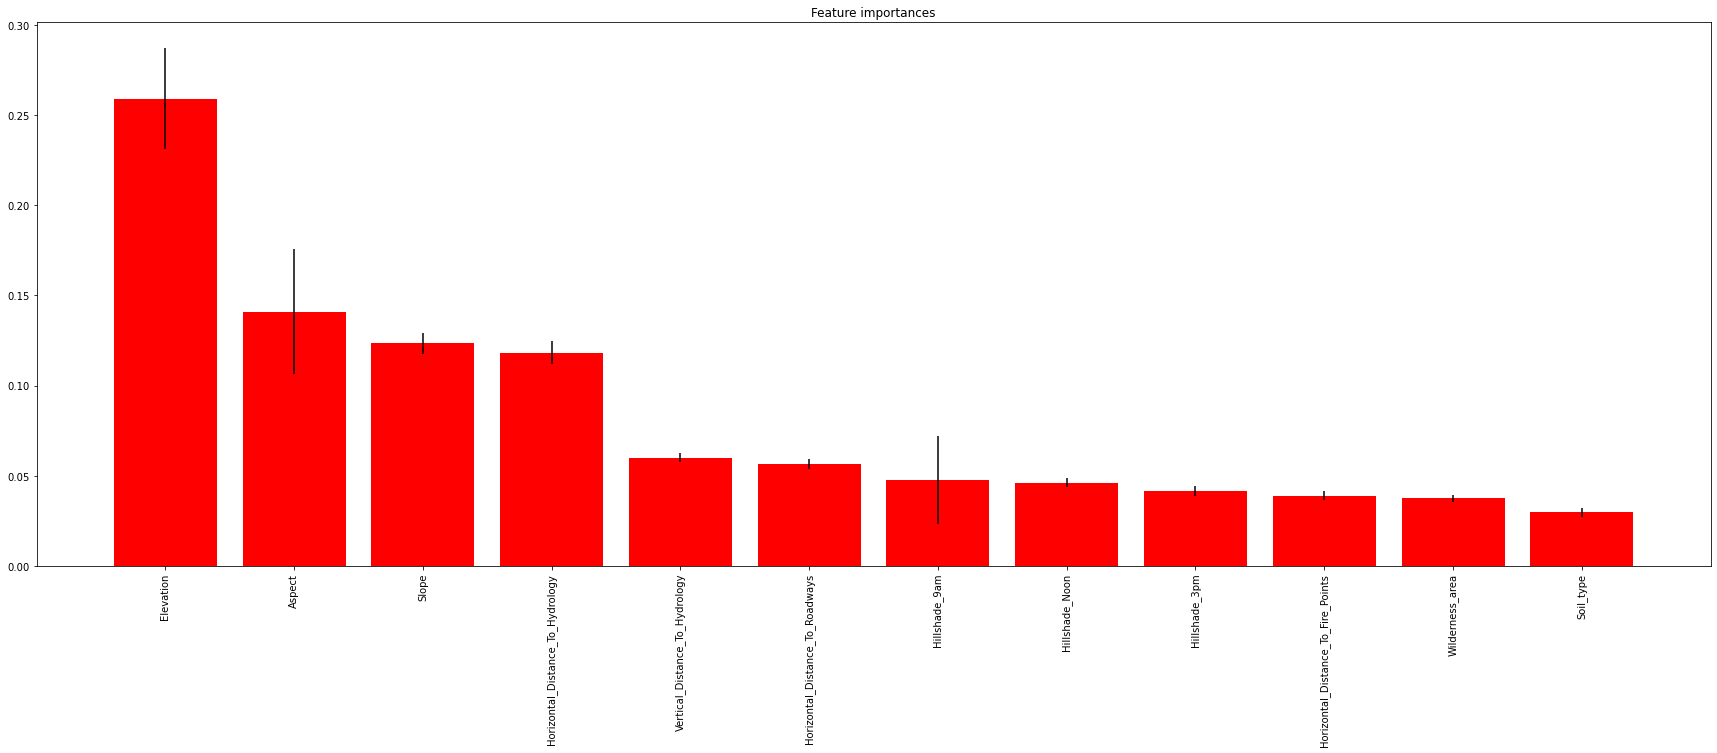

In [46]:
importances = Forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in Forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%50s feature %d (%f)" % (X.columns[f], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Performing feature selection with best features over the best two models so far

In [41]:
fields = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
X_change = X_train[fields]
x_test_change= X_test[fields]

print(X_change.shape)
print(Y_train.shape)
print(x_test_change.shape)
print(Y_test.shape)
# Feature selection using random forest model:
forest_model = train_random_forest(X_change, Y_train,30)
y_forest = prediction(x_test_change, forest_model)
print("Random forest model accuracy: ",accuracy_score(Y_test, y_forest))
# Feature selection using KNN model
KNN_model = train_using_knn(X_change, Y_train,3)
Y_KNN_model = prediction(x_test_change, KNN_model)
print("knn model accuracy: ",accuracy_score(Y_test, Y_KNN_model))

(284695, 10)
(284695, 1)
(122013, 10)
(122013, 1)
Predicted values: 
[1 7 3 ... 2 2 2]
Random forest model accuracy:  0.9330071385835935
Predicted values: 
[1 7 3 ... 2 2 2]
knn model accuracy:  0.9608074549433258


### Decision trees - Criterium: (Gini, Entropy)

In [17]:
def train_using_gini(X_train, y_train):
    # Gini index will prefer attributes where entropy is lower
    # Gini Index is a metric to measure how often a randomly
    # chosen element would be incorrectly identified.
    # Classifier obj
    clf_gini = DecisionTreeClassifier(class_weight=None, criterion="gini", max_depth=None,
    max_features=None, max_leaf_nodes=None,
    min_impurity_split=1e-07, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    presort=False, random_state=None, splitter="best")

    #train
    clf_gini.fit(X_train, y_train)
    return clf_gini
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [18]:
clf_gini = train_using_gini(X_train, Y_train)
clf_entropy = train_using_entropy(X_train, Y_train)

After training these two classification tree models, we test them using the entire (cleaned) dataset for a 10-fold cross validation

In [21]:
results_kfold_gini = model_selection.cross_val_score(clf_gini, X, y, cv=10)
results_kfold_Entropy = model_selection.cross_val_score(clf_entropy, X, y, cv=10)
print("Accuracy clf_gini: %.2f%%" % (results_kfold_gini.mean()*100.0))
print("Accuracy clf_Entropy: %.2f%%" % (results_kfold_Entropy.mean()*100.0))

Accuracy clf_gini: 93.01%
Accuracy clf_Entropy: 67.93%


### XGboost

In [156]:
import xgboost as xgb

In [157]:
import xgboost as xgb
from xgboost import XGBClassifier
print('> Training XGBoost classifier...')
params={
            'reg_alpha': 23, 
            'max_depth': 6, 
            'learning_rate': 0.1, 
            'gamma': 1.0,
            'n_estimators':1000,
            'min_child_weight':1,
            'subsample':0.8,
            'colsample_bytree':0.8,
            'objective': 'binary:logistic',
            'nthread':4,
            'scale_pos_weight':1,
            'seed':27
        }
data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
xg_reg = XGBClassifier(random_state=0, booster='gbtree', **params)


> Training XGBoost classifier...


In [158]:
xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)
print(preds.shape)
print(preds)


[23:47:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




KeyboardInterrupt: 

In [ ]:
print(accuracy_score(Y_test, preds))

### PCA Analyis

In [76]:
from sklearn.decomposition import PCA, KernelPCA
X_pca = PCA(n_components=2).fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

estimators = [
    ('DecisionStump', DecisionTreeClassifier(max_depth=1)),
    ('LogisticRegression',LogisticRegression()),
    ('knn',KNeighborsClassifier(n_neighbors=3,leaf_size=1,p=1)),
    #('SVC_lin', SVC(kernel='linear')),
]

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))

DecisionStump :  0.6332798961417037
LogisticRegression :  0.6258150810901187
knn :  0.9640823391720842


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y)

estimators = [
    ('DecisionStump', DecisionTreeClassifier(max_depth=1)),
    ('LogisticRegression',LogisticRegression()),
    ('knn',KNeighborsClassifier(n_neighbors=3,leaf_size=1,p=1)),
    #('SVC_lin', SVC(kernel='linear')),
]

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))

In [28]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    return accuracy_score(y_test, y_predicted)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
xrf_optimal_model = ExtraTreesClassifier(n_estimators=500, 
                                           max_features=None, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2,
                                           random_state=42)

In [31]:
xrf_optimal_model_accuracy = fit_evaluate_model(xrf_optimal_model, X_train, Y_train, X_test, Y_test)

KeyboardInterrupt: 

In [29]:
xrf_optimal_model_accuracy

0.9667412488833157

In [45]:
y_pred = xrf_optimal_model.predict(X_testing)
y_pred.shape

(174304,)

In [46]:
import numpy
column_names ={'id': range(len(y_pred)),
 'Cover_type':y_pred}

labels = pd.DataFrame(column_names)

labels.to_csv("Sebastian_Cajas_2.csv", sep=",",index=False)
print(labels)

            id  Cover_type
0            0           5
1            1           1
2            2           2
3            3           2
4            4           1
...        ...         ...
174299  174299           1
174300  174300           2
174301  174301           7
174302  174302           2
174303  174303           2

[174304 rows x 2 columns]


In [17]:
!pip install lightgbm

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.



In [26]:
# create model apply fit_evaluate_model
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)
y_predicted = lgbm_classifier.predict(X_test)
print(accuracy_score(Y_test, y_predicted))

0.8529337037856621


In [46]:
print(X_o.shape)
print(y_o.shape)
print(x_testing_o.shape)
X_o

(406708, 57)
(406708, 1)
(174304, 56)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,target,Soil_type,Wilderness_area
0,3342,15,13,350,55,2118,208,212,139,1486,...,0,0,0,0,0,0,0,1,31,3
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,2,10,3
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,2,12,1
3,3083,108,16,30,-14,2639,246,220,98,1909,...,0,0,0,0,0,0,0,1,31,3
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,1,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,3066,133,10,170,30,1455,237,235,128,2624,...,0,0,0,0,0,0,0,2,29,1
406704,2308,37,31,162,38,616,202,156,71,895,...,0,0,0,0,0,0,0,6,10,1
406705,2715,73,32,342,188,1027,237,162,31,953,...,0,0,0,0,0,0,0,2,33,3
406706,3020,179,13,170,19,1471,225,247,152,450,...,0,0,0,0,0,0,0,2,13,3


#### ExtraTreesClassifier model

In [58]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [59]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=10, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [60]:
# Fit on the all training data using random search object
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.4min


MemoryError: Unable to allocate 12.2 MiB for an array with shape (227756, 1, 7) and data type float64

In [ ]:
random_cv.best_estimator_

In [ ]:
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=400, 
                                                     max_features=None, 
                                                     min_samples_leaf=1, 
                                                     min_samples_split=2,
                                                     random_state=42)
xrf_classifier_w_random_search.fit(X_train, y_train)
y_predicted = xrf_classifier_w_random_search.predict(X_test)
print(accuracy_score(Y_test, y_predicted))

In [ ]:
print(y_predicted.shape)

In [ ]:
column_names ={'id': range(len(y_predicted)),
 'Cover_type':y_predicted}

labels = pd.DataFrame(column_names)

labels.to_csv("Sebastian_Cajas.csv", sep=",",index=False)
print(labels)

In [ ]:
This model yielded 97.1%